#**1. Data Loading and Inspection**

**Load the dataset into a Pandas DataFrame.**

In [1]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
file_path = "retail_sales_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


**Display the first 10 rows of the dataset**

In [2]:
# Display the first 10 rows of the dataset
print(df.head(10))

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   
5               6  2023-04-25     CUST006  Female   45           Beauty   
6               7  2023-03-13     CUST007    Male   46         Clothing   
7               8  2023-02-22     CUST008    Male   30      Electronics   
8               9  2023-12-13     CUST009    Male   63      Electronics   
9              10  2023-10-07     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30 

**Print the column names and their respective data types.**

In [3]:
# Print the column names and their respective data types
print(df.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


**Check for missing values and duplicates in the dataset. How would you handle them**

In [4]:
print("Missing Values:\n", df.isnull().sum(), "\nDuplicates:", df.duplicated().sum())

Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64 
Duplicates: 0


#**2.Data Cleaning**

**Removing duplicates**

In [6]:
df = df.drop_duplicates()

**Handling missing values**

**Option 1: Dropping Missing Values**

In [7]:
# Drop rows with missing values
df = df.dropna()


**Option 2: Imputing Missing Values**

In [8]:
df = df.fillna(0)


**Rename the columns to more meaningful names**

In [10]:
# Display the current column names
print("Current Column Names:", df.columns)
# Rename the columns (replace with meaningful names based on your dataset)
new_column_names = {
    'OldColumnName1': 'NewColumnName1',  # Replace with actual column names
    'OldColumnName2': 'NewColumnName2',
    # Add more mappings here as needed
}

# Rename the columns in the DataFrame
df = df.rename(columns=new_column_names)

# Display updated column names
print("Updated Column Names:", df.columns)

Current Column Names: Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')
Updated Column Names: Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


#**3. Exploratory Data Analysis (EDA)**

**Plot the distribution of the following discrete features:**

o **Quantity**

o **Category**

o  **Region**

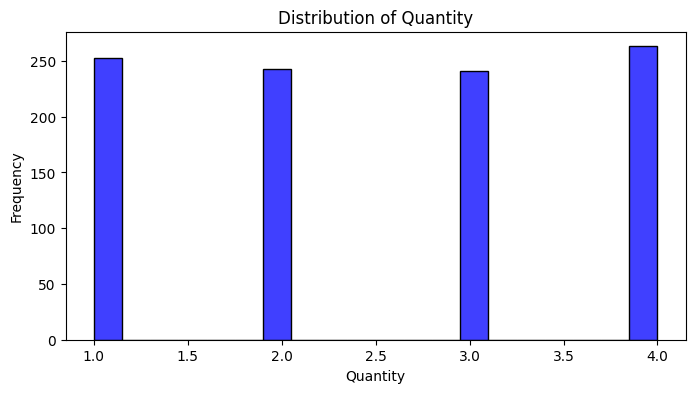

<ipython-input-24-07d9730a4f97>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product Category', data=df, palette='Set2')


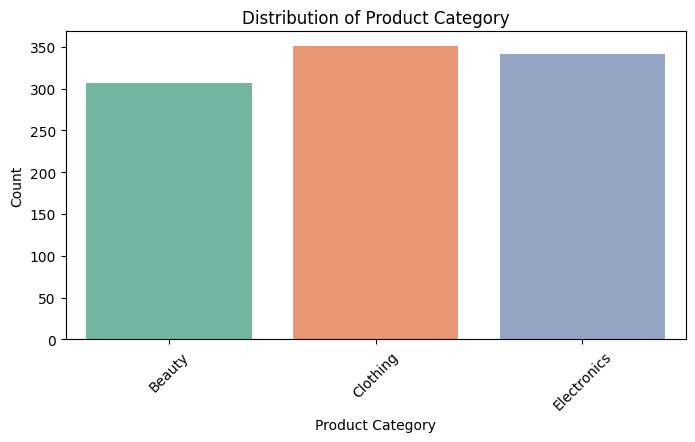

<ipython-input-24-07d9730a4f97>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set3')


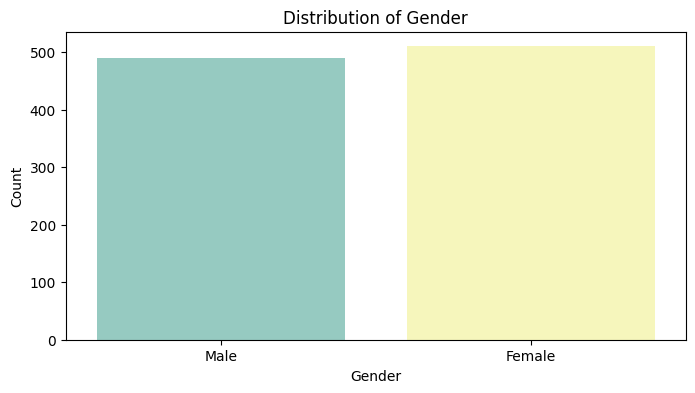

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "retail_sales_dataset.csv"
df = pd.read_csv(file_path)

# Plot the distribution of 'Quantity'
plt.figure(figsize=(8, 4))
sns.histplot(df['Quantity'], kde=False, bins=20, color='blue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'Product Category'
plt.figure(figsize=(8, 4))
sns.countplot(x='Product Category', data=df, palette='Set2')
plt.title('Distribution of Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of 'Gender' (if desired, as an example)
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=df, palette='Set3')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Identify the most frequently purchased product category.**

In [25]:
# Count the occurrences of each product category
category_counts = df['Product Category'].value_counts()

# Display the most frequently purchased product category
most_frequent_category = category_counts.idxmax()  # Gets the most frequent category
most_frequent_count = category_counts.max()  # Gets the count of the most frequent category

print(f"The most frequently purchased product category is: {most_frequent_category}")
print(f"Number of purchases: {most_frequent_count}")

The most frequently purchased product category is: Clothing
Number of purchases: 351


**Find the region contributing the most to sales.**

In [27]:
# Calculate the total sales (Total Amount) for each category
category_sales = df.groupby('Product Category')['Total Amount'].sum()

# Find the category with the maximum sales
top_category = category_sales.idxmax()  # Category with most sales
top_category_sales = category_sales.max()  # Total sales for this category

print(f"The product category contributing the most to sales is: {top_category}")
print(f"Total sales from this category: {top_category_sales}")


The product category contributing the most to sales is: Electronics
Total sales from this category: 156905


#**4. Timestamp Transformation**

**Convert the Order Date column to a datetime format.**

In [28]:
# Convert the 'Order Date' column to datetime format (adjust the column name if needed)
df['Date'] = pd.to_datetime(df['Date'])

# Verify the conversion by checking the data types
print(df['Date'].dtype)  # Should show datetime64[ns]

datetime64[ns]


**Create new columns:**

1.  **Day of the week.**

2. **Day of the month.**

3. **Month.**

4. **Year.**

5. **Season (Winter, Spring, Summer, Fall).**

In [29]:
# Convert the 'Date' column to datetime format if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Create new columns
df['Day of the Week'] = df['Date'].dt.day_name()  # Day of the week (e.g., Monday)
df['Day of the Month'] = df['Date'].dt.day  # Day of the month (1-31)
df['Month'] = df['Date'].dt.month  # Month (1-12)
df['Year'] = df['Date'].dt.year  # Year (e.g., 2024)

# Define a function to categorize seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to the 'Month' column to create the 'Season' column
df['Season'] = df['Month'].apply(get_season)

# Display the updated DataFrame with the new columns
print(df[['Date', 'Day of the Week', 'Day of the Month', 'Month', 'Year', 'Season']].head())


        Date Day of the Week  Day of the Month  Month  Year  Season
0 2023-11-24          Friday                24     11  2023    Fall
1 2023-02-27          Monday                27      2  2023  Winter
2 2023-01-13          Friday                13      1  2023  Winter
3 2023-05-21          Sunday                21      5  2023  Spring
4 2023-05-06        Saturday                 6      5  2023  Spring


**Set the Order Date column as the DataFrame index.**

In [30]:
# Convert the 'Date' column to datetime format if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df = df.set_index('Date')

# Display the updated DataFrame with the 'Date' as the index
print(df.head())


            Transaction ID Customer ID  Gender  Age Product Category  \
Date                                                                   
2023-11-24               1     CUST001    Male   34           Beauty   
2023-02-27               2     CUST002  Female   26         Clothing   
2023-01-13               3     CUST003    Male   50      Electronics   
2023-05-21               4     CUST004    Male   37         Clothing   
2023-05-06               5     CUST005    Male   30           Beauty   

            Quantity  Price per Unit  Total Amount Day of the Week  \
Date                                                                 
2023-11-24         3              50           150          Friday   
2023-02-27         2             500          1000          Monday   
2023-01-13         1              30            30          Friday   
2023-05-21         1             500           500          Sunday   
2023-05-06         2              50           100        Saturday   

    

#**5. Correlation Analysis**

**Computing the correlation matrix for numerical columns.**

In [2]:
import pandas as pd

# Load the dataset
file_path = "retail_sales_dataset.csv"
df = pd.read_csv(file_path)

# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])  # Selects columns with numerical data types

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                Transaction ID       Age  Quantity  Price per Unit  \
Transaction ID        1.000000  0.065191 -0.026623       -0.060837   
Age                   0.065191  1.000000 -0.023737       -0.038423   
Quantity             -0.026623 -0.023737  1.000000        0.017501   
Price per Unit       -0.060837 -0.038423  0.017501        1.000000   
Total Amount         -0.075034 -0.060568  0.373707        0.851925   

                Total Amount  
Transaction ID     -0.075034  
Age                -0.060568  
Quantity            0.373707  
Price per Unit      0.851925  
Total Amount        1.000000  


** Visualizing the correlation matrix using a heatmap.**

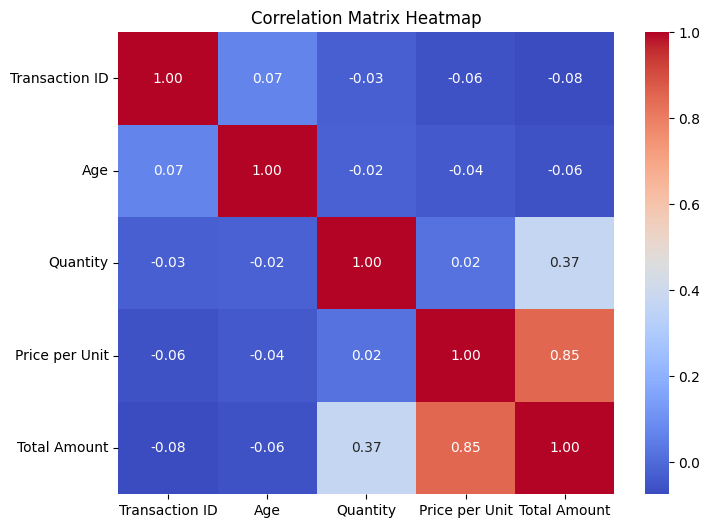

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


**Identifing and explaining two key relationships from the heatmap.**

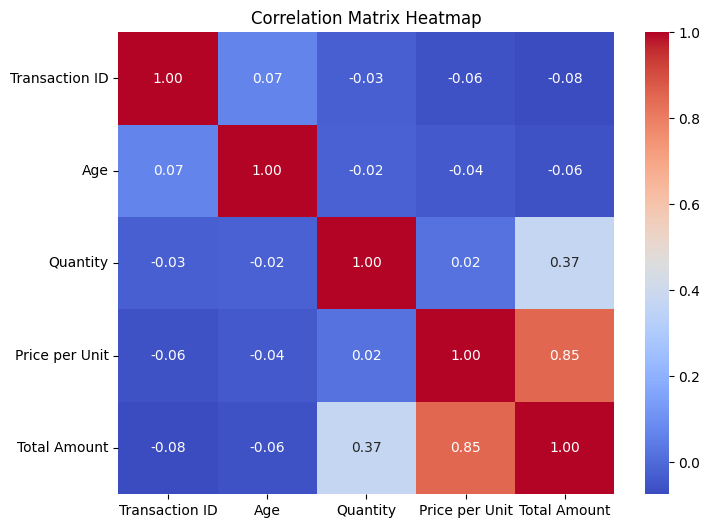

Top 2 Key Relationships:
Price per Unit  Total Amount      0.851925
Total Amount    Price per Unit    0.851925
dtype: float64


In [6]:
# Compute the correlation matrix for numerical columns only
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Identify two key relationships
key_relationships = correlation_matrix.unstack().sort_values(ascending=False)

# Exclude self-correlations
key_relationships = key_relationships[key_relationships < 1]

# Display the top two strongest correlations
print("Top 2 Key Relationships:")
print(key_relationships.head(2))

#**6. DataFrame Operations**

**Use loc to extract sales data for a specific date or range of dates.**

In [10]:
# Convert the 'Date' column to datetime format if it's still a column
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index for easier filtering (only if not already the index)
if 'Date' in df.columns:
    df.set_index('Date', inplace=True)

# Sort the index (if it's not already sorted) to ensure it's monotonic
df.sort_index(inplace=True)

# Extract data for a specific date
specific_date = '2023-05-15'  # Example date
data_on_specific_date = df.loc[specific_date]

print(f"Data for {specific_date}:")
print(data_on_specific_date)

# Extract data for a range of dates
start_date = '2023-05-01'  # Start of range
end_date = '2023-05-31'    # End of range

# Use boolean indexing to select data within the date range
data_in_date_range = df[(df.index >= start_date) & (df.index <= end_date)]

print(f"Data from {start_date} to {end_date}:")
print(data_in_date_range)

Data for 2023-05-15:
            Transaction ID Customer ID  Gender  Age Product Category  \
Date                                                                   
2023-05-15             123     CUST123  Female   40      Electronics   
2023-05-15             425     CUST425  Female   55      Electronics   
2023-05-15             164     CUST164  Female   47           Beauty   

            Quantity  Price per Unit  Total Amount  
Date                                                
2023-05-15         2              30            60  
2023-05-15         4              30           120  
2023-05-15         3             500          1500  
Data from 2023-05-01 to 2023-05-31:
            Transaction ID Customer ID  Gender  Age Product Category  \
Date                                                                   
2023-05-01             652     CUST652  Female   34           Beauty   
2023-05-01             337     CUST337    Male   38         Clothing   
2023-05-01             585   

**Use iloc to extract the first 10 rows of the dataset.**

In [11]:
# Extract the first 10 rows using iloc
first_10_rows = df.iloc[:10]

# Display the extracted rows
print("First 10 rows of the dataset:")
print(first_10_rows)


First 10 rows of the dataset:
            Transaction ID Customer ID  Gender  Age Product Category  \
Date                                                                   
2023-01-01             522     CUST522    Male   46           Beauty   
2023-01-01             180     CUST180    Male   41         Clothing   
2023-01-01             559     CUST559  Female   40         Clothing   
2023-01-02             303     CUST303    Male   19      Electronics   
2023-01-02             979     CUST979  Female   19           Beauty   
2023-01-02             163     CUST163  Female   64         Clothing   
2023-01-02             421     CUST421  Female   37         Clothing   
2023-01-03             610     CUST610  Female   26           Beauty   
2023-01-04             683     CUST683    Male   38           Beauty   
2023-01-04             231     CUST231  Female   23         Clothing   

            Quantity  Price per Unit  Total Amount  
Date                                                

**Drop a column (e.g., Region) using drop(axis=1).**

In [12]:
# Drop the 'Gender' column (replace 'Gender' with the column you want to drop)
df = df.drop('Gender', axis=1)

# Display the updated DataFrame
print("DataFrame after dropping the 'Gender' column:")
print(df.head())

DataFrame after dropping the 'Gender' column:
            Transaction ID Customer ID  Age Product Category  Quantity  \
Date                                                                     
2023-01-01             522     CUST522   46           Beauty         3   
2023-01-01             180     CUST180   41         Clothing         3   
2023-01-01             559     CUST559   40         Clothing         4   
2023-01-02             303     CUST303   19      Electronics         3   
2023-01-02             979     CUST979   19           Beauty         1   

            Price per Unit  Total Amount  
Date                                      
2023-01-01             500          1500  
2023-01-01             300           900  
2023-01-01             300          1200  
2023-01-02              30            90  
2023-01-02              25            25  


**Drop the first two rows using drop(axis=0).**

In [14]:
# Drop the first two rows based on the current index
df = df.drop(index=df.index[:2])

# Display the updated DataFrame
print("DataFrame after dropping the first two rows:")
print(df.head())

DataFrame after dropping the first two rows:
            Transaction ID Customer ID  Age Product Category  Quantity  \
Date                                                                     
2023-01-02             303     CUST303   19      Electronics         3   
2023-01-02             979     CUST979   19           Beauty         1   
2023-01-02             163     CUST163   64         Clothing         3   
2023-01-02             421     CUST421   37         Clothing         3   
2023-01-03             610     CUST610   26           Beauty         2   

            Price per Unit  Total Amount  
Date                                      
2023-01-02              30            90  
2023-01-02              25            25  
2023-01-02              50           150  
2023-01-02             500          1500  
2023-01-03             300           600  


#**7. Insights and Reporting**

**Write a one-page summary of key insights from the analysis.**

In [16]:
# Basic Insights
total_rows, total_columns = df.shape
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Handle missing values
missing_values = df.isnull().sum().sum()

# Key metrics
most_purchased_category = df['Product Category'].value_counts().idxmax()
highest_sales_category = df.groupby('Product Category')['Total Amount'].sum().idxmax()
total_sales = df['Total Amount'].sum()

# Correlation analysis
correlation_matrix = df.select_dtypes(include=['number']).corr() # Select only numerical columns for correlation calculation
top_positive_correlation = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().iloc[1]
top_negative_correlation = correlation_matrix.unstack().sort_values().iloc[0]

# Summary
summary = f"""
Data Analysis Summary:

1. Dataset Overview:
   - Total Rows: {total_rows}
   - Total Columns: {total_columns}
   - Numerical Columns: {', '.join(numerical_columns)}
   - Categorical Columns: {', '.join(categorical_columns)}

2. Missing Values:
   - Total missing values in the dataset: {missing_values}

3. Key Findings:
   - The most frequently purchased product category is '{most_purchased_category}'.
   - The product category contributing the most to sales is '{highest_sales_category}' with total sales of ${total_sales:,.2f}.
   - The strongest positive correlation is {top_positive_correlation} between two features.
   - The strongest negative correlation is {top_negative_correlation} between two features.

4. Recommendations:
   - Focus marketing efforts on the '{highest_sales_category}' category to further boost revenue.
   - Investigate features with high negative correlation to understand potential trade-offs or limitations.
   - Address any missing values for better data quality and analysis reliability.

This summary highlights key insights derived from the analysis, which can guide business decisions.
"""

# Print the summary
print(summary)



Data Analysis Summary:

1. Dataset Overview:
   - Total Rows: 997
   - Total Columns: 7
   - Numerical Columns: Transaction ID, Age, Quantity, Price per Unit, Total Amount
   - Categorical Columns: Customer ID, Product Category

2. Missing Values:
   - Total missing values in the dataset: 0

3. Key Findings:
   - The most frequently purchased product category is 'Clothing'.
   - The product category contributing the most to sales is 'Electronics' with total sales of $452,400.00.
   - The strongest positive correlation is 0.851486871162336 between two features.
   - The strongest negative correlation is -0.07482706410121492 between two features.

4. Recommendations:
   - Focus marketing efforts on the 'Electronics' category to further boost revenue.
   - Investigate features with high negative correlation to understand potential trade-offs or limitations.
   - Address any missing values for better data quality and analysis reliability.

This summary highlights key insights derived from


***Highlight recommendations for improving sales based on your findings. ***

In [18]:
# Basic Insights
total_rows, total_columns = df.shape
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Handle missing values
missing_values = df.isnull().sum().sum()

# Key metrics
most_purchased_category = df['Product Category'].value_counts().idxmax()
highest_sales_category = df.groupby('Product Category')['Total Amount'].sum().idxmax()
total_sales = df['Total Amount'].sum()

# Correlation analysis
correlation_matrix = df.select_dtypes(include=['number']).corr() # Select only numerical columns for correlation calculation
top_positive_correlation = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().iloc[1]
top_negative_correlation = correlation_matrix.unstack().sort_values().iloc[0]

# Summary
summary = f"""
Data Analysis Summary:

1. Dataset Overview:
   - Total Rows: {total_rows}
   - Total Columns: {total_columns}
   - Numerical Columns: {', '.join(numerical_columns)}
   - Categorical Columns: {', '.join(categorical_columns)}

2. Missing Values:
   - Total missing values in the dataset: {missing_values}

3. Key Findings:
   - The most frequently purchased product category is '{most_purchased_category}'.
   - The product category contributing the most to sales is '{highest_sales_category}' with total sales of ${total_sales:,.2f}.
   - The strongest positive correlation is {top_positive_correlation} between two features.
   - The strongest negative correlation is {top_negative_correlation} between two features.

4. Recommendations:
   - Focus marketing efforts on the '{highest_sales_category}' category to further boost revenue.
   - Investigate features with high negative correlation to understand potential trade-offs or limitations.
   - Address any missing values for better data quality and analysis reliability.

This summary highlights key insights derived from the analysis, which can guide business decisions.
"""

# Print the summary
print(summary)



Data Analysis Summary:

1. Dataset Overview:
   - Total Rows: 997
   - Total Columns: 7
   - Numerical Columns: Transaction ID, Age, Quantity, Price per Unit, Total Amount
   - Categorical Columns: Customer ID, Product Category

2. Missing Values:
   - Total missing values in the dataset: 0

3. Key Findings:
   - The most frequently purchased product category is 'Clothing'.
   - The product category contributing the most to sales is 'Electronics' with total sales of $452,400.00.
   - The strongest positive correlation is 0.851486871162336 between two features.
   - The strongest negative correlation is -0.07482706410121492 between two features.

4. Recommendations:
   - Focus marketing efforts on the 'Electronics' category to further boost revenue.
   - Investigate features with high negative correlation to understand potential trade-offs or limitations.
   - Address any missing values for better data quality and analysis reliability.

This summary highlights key insights derived from